Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Collecting the Data

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\titanic_train (1).csv")

Exploratory Data Analysis :- The process of describing the main characterstics of the data and extracting helpful insights

*Generally Classified into 2 parts:
1. Non-Graphical 
2. Graphical 

In [3]:
# Non-Graphical Analysis
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It shows that there are a total of 891 rows in the dataset and 12 columns. A quick look shows that the Age & Cabin column have some null values. 

In [6]:
# Checking the Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age column has 177 null values, and the cabin column has 687 null Values. 

In [7]:
# Examining Data Distribution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Non-Graphical Analysis

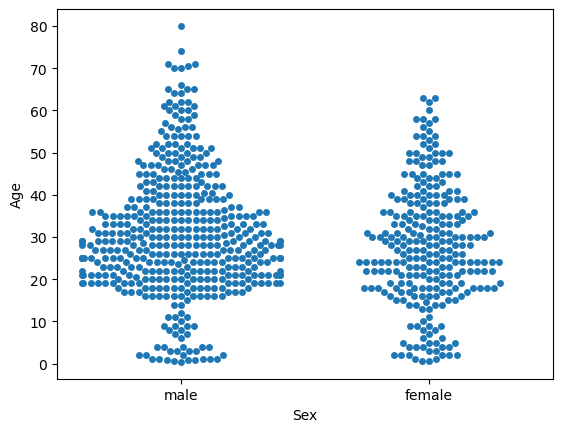

In [8]:
# Creating a swarmplot for 1 categorical variable and 1 continous variable
sns.swarmplot(x='Sex' ,y='Age', data=df)
plt.show()

The swarmplot shows that the majourity of the people that boarded the titanic both male & female were between the ages of 20-40, with a few exceptions.

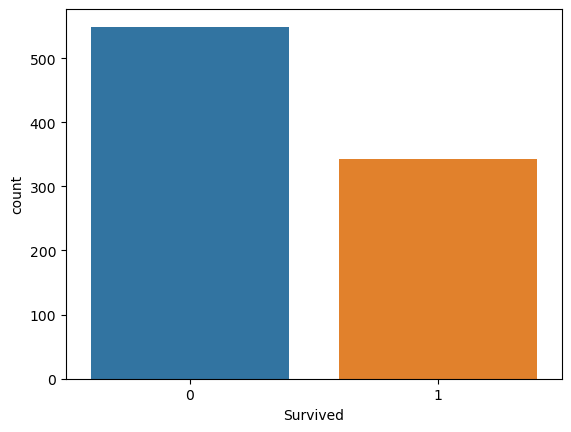

In [9]:
sns.countplot(x='Survived', data=df)
plt.show()

The above graph depicts whether the passenger survived or not (0 = Did not survive, 1 = Survived)

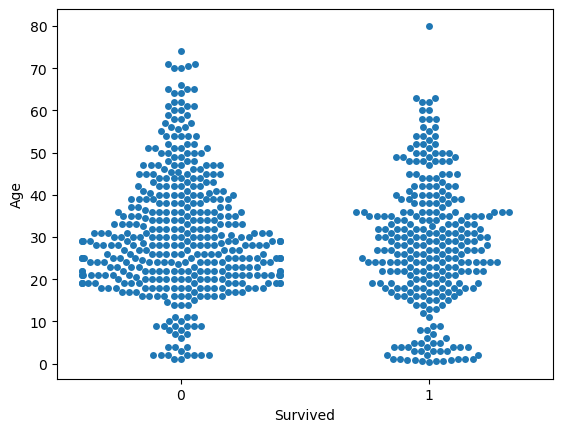

In [10]:
sns.swarmplot(x='Survived', y='Age', data=df)
plt.show()

The above graph tells us the age groups of the passenger and whether they survived or not, looking at the graph it is clear that in both the cases, the age group of the passengers remains the same i.e. 20-50.

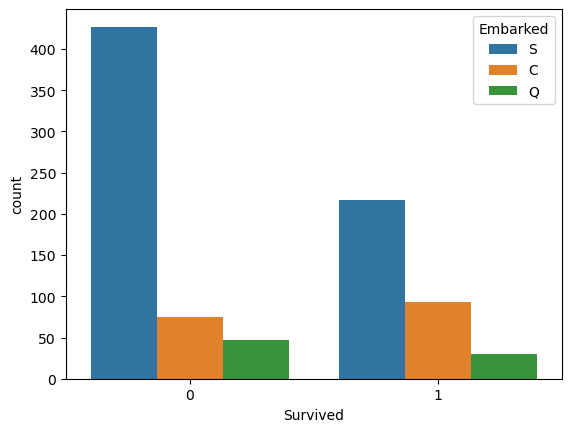

In [11]:
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.show()

Treating the null values that we found earlier

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Checking the percentage of null values in both the columns
null_age = (df['Age'].isnull().sum()/len(df['Age'])*100).round(2)
null_cabin = (df['Cabin'].isnull().sum()/len(df['Cabin'])*100).round(2)

print(f"The percentage of null value in column Age is {null_age} and in column Cabin is {null_cabin}")

The percentage of null value in column Age is 19.87 and in column Cabin is 77.1


Since the percentage of null values in column cabin is larger than 40-60% so there is no point in keeping this column and hence we should discard it.

In [14]:
df.drop('Cabin', inplace=True, axis=1)

In [15]:
# Treating the null values of column age
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

In [16]:
# Checking the null values again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Encoding the categorical variables

In [17]:
# Checking the data types in the dataset
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Categorical variables represent non-numeric values such as names, labels, categories and machine learning model require numeric values. Columns such as Name,Sex,Age and Ticket represent non-numeric values. We can treat these values by using One Hot Encoding changing them from categorical to numerical values. 

In [18]:
# Firstly changing the data type of age column to float
df['Age'] = pd.to_numeric(df['Age'],errors='coerce').astype(float)

In [19]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [20]:
# Now changing the categorical variables to numeric values 
gender = pd.get_dummies(df['Sex'], drop_first=True)
gender = gender.astype(int)
df['Gender'] = gender

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [22]:
df.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


Splitting the data into train & test using train_test_split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = df['Survived']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=100)

Model Selection

Using Logistic Regression

In [26]:
# Importing the model
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
model_pred_train = model.predict(x_train)

In [31]:
model_pred_test = model.predict(x_test)

In [32]:
# Using the confusion matric to display the no. of TP,TN,FP,FN
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,model_pred_test),columns=['Predicted No','Predicted Yes'])

,Predicted No,Predicted Yes
0,91,13
1,23,52


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       104
           1       0.80      0.69      0.74        75

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



The Logistic Regression model predicts an accuracy of 80% and f1 score of 83% (f1 score is the harmonic mean between precision and recall) 

Applying a different model now

RandomForest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=100)

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [38]:
predictions = model.predict(x_test)

In [39]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


Random Forest Classifier gives us a accuracy of 83%, which means that our Random Forest model is a better choice for the prediction. 

In [40]:
# Printing a more detailed classification report
print("Classification Report: ")
print(classification_report(y_test, predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.84      0.75      0.79        75

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Detailed report gives an f1 score of 86%